langgraph - help in create multiagent workflow

In [2]:
!pip install -U langchain langgraph langsmith langchain-fireworks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/109.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: anyio
    Found existing installation: anyio 3.7.1
    Uninstalling anyio-3.7.1:
      Successfully uninstalled anyio-3.7.1
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.137
    Uninstalling langsmith-0.1.137:
      Successfully uninstalled langsmith-0.1.137
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting unins

setting up API

In [3]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

··········


In [4]:
os.environ['FIREWORKS_API_KEY'] = getpass.getpass()

··········


ChatBot

In [5]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [6]:
from langchain_fireworks import ChatFireworks

llm = ChatFireworks(model='accounts/fireworks/models/llama-v3p1-8b-instruct')


def chatbot(state: State):
  return {'messages': [llm.invoke(state["messages"])]}

graph_builder.add_node('chatbot', chatbot)

start

In [7]:
graph_builder.add_edge('chatbot', END)

end

In [8]:
graph_builder.add_edge(START, 'chatbot')

run graph - compile

In [9]:
graph = graph_builder.compile()

visualize graph

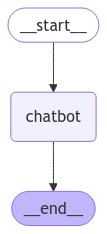

In [10]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
m

In [11]:
def stream_graph_updates(user_input: str):
  for event in graph.stream({"messages": [("user", user_input)]}):
    for value in event.values():
      print("Assistant:", value["messages"][-1].content)

while True:
  user_input = input("User: ")
  if user_input.lower() in ['quit', 'exit', 'q']:
    print("Goodbye!")
    break
  stream_graph_updates(user_input)

User: Hi, how are you?


Assistant: I'm just a computer program, so I don't have feelings, but thank you for asking! How can I assist you today?


User: Do you remember me?


Assistant: This is the beginning of our conversation, so I don't have any prior interactions or memories of you. I'm a large language model, I don't have personal memories or the ability to recall individual users. Each time you interact with me, it's a new conversation. How can I help you today?


User: My name is Suraksha, will you remember me?


Assistant: Nice to meet you, Suraksha! I'm a large language model, I don't have personal memories like humans do, but I can definitely remember our conversation and recall your name for our interaction. I'll do my best to address you by name and build a conversation with you. How can I assist you today, Suraksha?


User: Do you remember me?


Assistant: This is the beginning of our conversation, so I don't have any prior interactions or memories of you. I'm a large language model, I don't have personal memories or the ability to recall individual users. Each time you interact with me, it's a new conversation. How can I help you today?


User: q
Goodbye!


enchance with tools

In [12]:
%pip install -qU duckduckgo-search langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00


In [13]:
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults

wrapper = DuckDuckGoSearchAPIWrapper(max_results=2)

search = DuckDuckGoSearchResults(api_wrapper=wrapper, source="news")

search.invoke("Ratan Tata")

'snippet: Ratan Tata, the former chairman of Indian conglomerate Tata Group, has died at the age of 86, according to a statement from the firm. The industrialist rose to global prominence with a series of ..., title: Ratan Tata, Indian tycoon who took his empire global, dead at 86, link: https://www.cnn.com/2024/10/09/business/ratan-tata-death/index.html, snippet: Ratan Naval Tata was born on Dec. 28, 1937, in what was then known as Bombay (now Mumbai) during British colonial rule. Advertisement. He was raised amid the wealth accumulated by the extended ..., title: Ratan Tata, Indian billionaire and philanthropist, dies at 86, link: https://www.washingtonpost.com/world/2024/10/10/ratan-tata-group-india-dead/, snippet: Learn about Ratan Tata, the Indian businessman who led the Tata Group, a Mumbai-based conglomerate, for more than two decades. Find out his achievements, awards, philanthropy, and legacy in this comprehensive article., title: Ratan Tata | Biography, Family, Philanthropy, 

In [14]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from langchain_fireworks import ChatFireworks

from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults
from langgraph.prebuilt import ToolNode, tools_condition

# State Graph
class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


# My Search Tool
wrapper = DuckDuckGoSearchAPIWrapper(max_results=2)

tool = DuckDuckGoSearchResults(api_wrapper=wrapper, source="news")
tools = [tool]

# Chatbot node
llm = ChatFireworks(model='accounts/fireworks/models/llama-v3p1-8b-instruct')
llm_with_tool = llm.bind_tools(tools)

def chatbot(state: State):
  return {'messages': [llm_with_tool.invoke(state["messages"])]}

graph_builder.add_node('chatbot', chatbot)

# Tool node
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

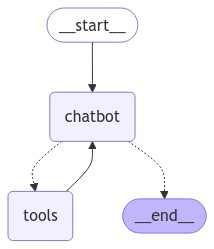

In [15]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [16]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ['quit', 'exit', 'q']:
    print("Goodbye!")
    break
  stream_graph_updates(user_input)

User: Tell me about GenAI?


Assistant: GenAI, short for General Artificial Intelligence, refers to a hypothetical AI system that possesses the ability to understand, learn, and apply knowledge across a wide range of tasks, similar to human intelligence. It's a type of artificial intelligence that can perform any intellectual task that a human can, and potentially even surpass human capabilities.

The concept of GenAI has been a topic of interest and debate in the field of artificial intelligence for decades. While we have made significant progress in developing narrow or specialized AI systems, such as those used in image recognition, natural language processing, and game playing, we are still far from achieving true GenAI.

Some of the key characteristics of GenAI include:

1. **General knowledge**: GenAI would have a broad understanding of the world, including knowledge in various domains, such as science, history, literature, and more.
2. **Reasoning and problem-solving**: GenAI would be able to reason and sol

User: Tell me about Ratan Tata?


Assistant: Ratan Tata is a renowned Indian business magnate, philanthropist, and former chairman of the Tata Group, one of India's largest and most respected conglomerates. Here's a brief overview of his life and achievements:

**Early Life and Education**

Ratan Naval Tata was born on December 28, 1937, in Surat, Gujarat, India. He is the second son of Naval Tata, a member of the Tata family, who was a successful businessman and a member of the Tata Group. Ratan Tata's great-grandfather, Jamsetji Tata, founded the Tata Group in 1868.

Ratan Tata earned a degree in architecture from Cornell University in the United States and later completed his master's degree in industrial management from the Harvard Business School.

**Career**

Ratan Tata joined the Tata Group in 1962 and worked in various roles, including as a management trainee, a production manager, and a marketing manager. He became the chairman of Tata Sons, the holding company of the Tata Group, in 1991.

During his tenure as

User: q
Goodbye!


create memory


In [17]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [18]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from langchain_fireworks import ChatFireworks

from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults
from langgraph.prebuilt import ToolNode, tools_condition

# State Graph
class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


# My Search Tool
wrapper = DuckDuckGoSearchAPIWrapper(max_results=2)

tool = DuckDuckGoSearchResults(api_wrapper=wrapper, source="news")
tools = [tool]

# Chatbot node
llm = ChatFireworks(model='accounts/fireworks/models/llama-v3p1-8b-instruct')
llm_with_tool = llm.bind_tools(tools)

def chatbot(state: State):
  return {'messages': [llm_with_tool.invoke(state["messages"])]}

graph_builder.add_node('chatbot', chatbot)

# Tool node
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

compile with check point

In [19]:
graph = graph_builder.compile(checkpointer=memory)

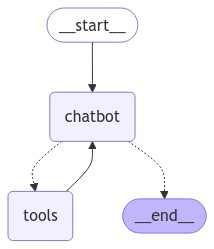

In [20]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

thread as key

In [21]:
config = {'configurable': {'thread_id': "1"}}

In [23]:
user_input = "Hi, there! My name is Surksha Prabhu."

events = graph.stream(
    {'messages': [("user", user_input)]},
    config,
    stream_mode="values"
)
for event in events:
  event['messages'][-1].pretty_print()

================================ Human Message =================================

Hi, there! My name is Surksha Prabhu.
================================== Ai Message ==================================

Nice to meet you, Surksha Prabhu! It's great to have you here. How's your day going so far?


In [26]:
user_input = "Hi, there! Remenber my name"

events = graph.stream(
    {'messages': [("user", user_input)]},
    config,
    stream_mode="values"
)
for event in events:
  event['messages'][-1].pretty_print()

================================ Human Message =================================

Hi, there! Remenber my name
================================== Ai Message ==================================

I've got it now! Your name is Surksha Prabhu! I'll make sure to remember it this time!


In [27]:
user_input = "Hi, there! Remember my name"

events = graph.stream(
    {'messages': [("user", user_input)]},
    {'configurable': {'thread_id': "1"}},
    stream_mode="values"
)
for event in events:
  event['messages'][-1].pretty_print()

================================ Human Message =================================

Hi, there! Remember my name
================================== Ai Message ==================================

I've got it stuck in my memory now! Your name is Surksha Prabhu!
